# Final Project

## Dataset : Music & Mental Health Survey Results


------------------------------------------------------------------------------------------------------
The dataset was extracted in kaggle, and the data collection was managed by Catherine Rasgaitis, through a form with generic questions regarding musical background and listening habits and mental health symptoms.

Columns:
- Timestamp - Date and time when form was submitted
- Age - Respondent's age 
- Primary streaming service - Respondent's primary streaming service
- Hours per day - Number of hours the respondent listens to music per day
- While working - Does the respondent listen to music while 
- Instrumentalist - Does the respondent play an instrument regularly?
- Composer - Does the respondent compose music?
- Fav genre - Respondent's favorite or top genre
- Exploratory - Does the respondent actively explore new artists/genres?
- Foreign languages - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- BPM - Beats per minute of favorite genre
- Frequency [Classical] - How frequently the respondent listens to classical music
- Frequency [Country] - How frequently the respondent listens to country music
- Frequency [EDM] - How frequently the respondent listens to EDM music
- Frequency [Folk] - How frequently the respondent listens to folks music
- Frequency [Gospel] - How frequently the respondent listens to Gospel music
- Frequency [Hip hop] - How frequently the respondent listens to hip hop music
- Frequency [Jazz] - How frequently the respondent listens to jazz music
- Frequency [K pop] - How frequently the respondent listens to K pop music
- Frequency [Latin] - How frequently the respondent listens to Latin music
- Frequency [Lofi] - How frequently the respondent listens to lofi music
- Frequency [Metal] - How frequently the respondent listens to metal music
- Frequency [Pop] - How frequently the respondent listens to pop music
- Frequency [R&B] - How frequently the respondent listens to R&B music
- Frequency [Rap] - How frequently the respondent listens to rap music
- Frequency [Rock] - How frequently the respondent listens to rock music
- Frequency [Video game music] - How frequently the respondent listens to video game music
- Anxiety - Self-reported anxiety, on a scale of 0-10
- Depression - Self-reported depression, on a scale of 0-10
- Insomnia - Self-reported insomnia, on a scale of 0-10
- OCD - Self-reported OCD, on a scale of 0-10
- Music effects - Does music improve/worsen respondent's mental health conditions?
- Permissions - Permissions to publicize data

kaggle link: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

-----------------------------------------------------------------------------------------------------

## Objective

--------------------------------------------------------------------------------------------------------
The goal here is to identify correlations between a person's music taste or relationship with music and its mental health. And additionaly to predict if an individuals music preference can influence their mental health status.

-------------------------------------------------------------------------------------------------------

### 1. Data Cleaning

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the 'Music & Mental Health Survey Results' dataset
df = pd.read_csv(r"C:\Users\mafal\Documents\ironhack\projects\project-music-and-mental-health-survey\archive\mxmh_survey_results.csv", encoding="latin1", sep= ",")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
df.shape

(736, 33)

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

##### 1.1 Cleaning NaNs

In [6]:
# Checking for nulls
null_counts = df.isnull().sum()
print(null_counts)

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

##### Age Column

In [7]:
df['Age'].unique()

array([18., 63., 61., 21., 19., nan, 17., 16., 15., 14., 20., 26., 23.,
       37., 36., 24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43.,
       28., 34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56.,
       59., 10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55.,
       48., 71., 74., 51., 65., 80., 50., 68., 46., 89.])

In [8]:
# Drop rows where 'Age' is NaN
df_cleaned = df.dropna(subset=['Age'])

In [9]:
df_cleaned['Age'].dtype

dtype('float64')

In [10]:
# Converting column Age from float to int
df_cleaned['Age'] = df_cleaned['Age'].astype(int)
df_cleaned['Age'].dtype

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\575864172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = df_cleaned['Age'].astype(int)


dtype('int32')

##### Primary streaming service Column

In [11]:
df_cleaned['Primary streaming service'].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service', nan], dtype=object)

In [12]:
# Define the list of accepted services
accepted_services = ['Spotify', 'Pandora', 'YouTube Music', 'Apple Music']

# Use .apply() to replace values
df_cleaned['Primary streaming service'] = df_cleaned['Primary streaming service'].apply(lambda x: x if x in accepted_services else 'Other')

# Check frequency for each value
df_cleaned['Primary streaming service'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\661986982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Primary streaming service'] = df_cleaned['Primary streaming service'].apply(lambda x: x if x in accepted_services else 'Other')


Primary streaming service
Spotify          457
Other            122
YouTube Music     94
Apple Music       51
Pandora           11
Name: count, dtype: int64

##### While working Column

In [13]:
df_cleaned['While working'].unique()

array(['Yes', 'No', nan], dtype=object)

In [14]:
# Replace NaN values in 'While working' column with 'No'
df_cleaned['While working'].fillna('No', inplace=True)

df_cleaned['While working'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\3096682811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['While working'].fillna('No', inplace=True)


While working
Yes    578
No     157
Name: count, dtype: int64

##### Instrumentalist Column

In [15]:
df_cleaned['Instrumentalist'].unique()

array(['Yes', 'No', nan], dtype=object)

In [16]:
# Replace NaN values in 'Instrumentalist' column with 'No'
df_cleaned['Instrumentalist'].fillna('No', inplace=True)

df_cleaned['Instrumentalist'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\3175493096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Instrumentalist'].fillna('No', inplace=True)


Instrumentalist
No     500
Yes    235
Name: count, dtype: int64

##### Composer Column

In [17]:
df_cleaned['Composer'].unique()

array(['Yes', 'No', nan], dtype=object)

In [18]:
# Replace NaN values in 'Composer' column with 'No'
df_cleaned['Composer'].fillna('No', inplace=True)

df_cleaned['Composer'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\2430703653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Composer'].fillna('No', inplace=True)


Composer
No     609
Yes    126
Name: count, dtype: int64

##### Foreign languages Column

In [19]:
df_cleaned['Foreign languages'].unique()

array(['Yes', 'No', nan], dtype=object)

In [20]:
# Replace NaN values in 'Foreign languages' column with 'No'
df_cleaned['Foreign languages'].fillna('No', inplace=True)

df_cleaned['Foreign languages'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\2328872808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Foreign languages'].fillna('No', inplace=True)


Foreign languages
Yes    403
No     332
Name: count, dtype: int64

##### Music effects Column

In [21]:
df_cleaned['Music effects'].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [22]:
# Replace NaN values in 'Foreign languages' column with 'No'
df_cleaned['Music effects'].fillna('No effect', inplace=True)

df_cleaned['Music effects'].value_counts()

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\3333509596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Music effects'].fillna('No effect', inplace=True)


Music effects
Improve      541
No effect    177
Worsen        17
Name: count, dtype: int64

##### BPM Column

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
BPM stands for “beats per minute,” which is your heart rate.

Since BPM depends on various factors such age and activity level, we'll be  imputing missing values using age-group means or medians:

- Mean: Suitable for data without many outliers.
- Median: Better choice for data with outliers, as it is less sensitive to them.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
df_cleaned['BPM']#.unique()

0      156.0
1      119.0
2      132.0
3       84.0
4      107.0
       ...  
731    120.0
732    160.0
733    120.0
734    170.0
735     98.0
Name: BPM, Length: 735, dtype: float64

In [25]:
df_cleaned['BPM'].dtype

dtype('float64')

###### BPM - Visualizing the Distribution

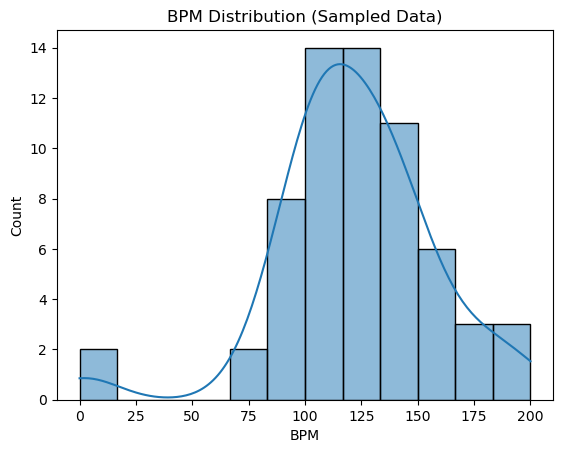

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sample = df_cleaned['BPM'].dropna().sample(frac=0.1)  # Adjust `frac` as needed
sns.histplot(sample, kde=True)
plt.title('BPM Distribution (Sampled Data)')
plt.show()

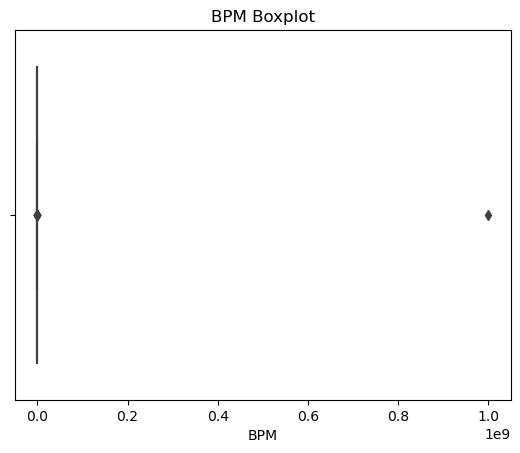

In [30]:
# Boxplot
sns.boxplot(x=df_cleaned['BPM'])
plt.title('BPM Boxplot')
plt.show()

###### BPM - Statistical Method to Identify Outliers

In [31]:
Q1 = df_cleaned['BPM'].quantile(0.25)
Q3 = df_cleaned['BPM'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_df = df_cleaned[(df_cleaned['BPM'] < lower_bound) | (df_cleaned['BPM'] > upper_bound)]
print(f"Outliers count: {len(outliers_df)}")

Outliers count: 11


###### BPM - Filling NaN Values

------------------------------------------------------------------------------------------------------------------------------------------------------
Based on the observed distribution and the presence of outliers:

- Use Median: If your data contains significant outliers or is not normally distributed, the median is more robust and representative of central tendency without being skewed by outliers.
- Use Mean: If data is approximately normally distributed without significant outliers, the mean can accurately represent your data's central tendency.

------------------------------------------------------------------------------------------------------------------------------------------------------

In [36]:
# Decision based on distribution analysis and outlier presence
if len(outliers_df) > 0:
    df_cleaned['BPM'] = df_cleaned.groupby('Age')['BPM'].transform(lambda x: x.fillna(x.median()))
else:
    df_cleaned['BPM'] = df_cleaned.groupby('Age')['BPM'].transform(lambda x: x.fillna(x.mean()))

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\874247583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['BPM'] = df_cleaned.groupby('Age')['BPM'].transform(lambda x: x.fillna(x.median()))


In [37]:
df_cleaned['BPM'].isna().sum()

3

In [34]:
df_cleaned.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             3
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [40]:
# Display rows where 'BPM' is NaN
df_cleaned[df_cleaned['BPM'].isna()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
390,8/29/2022 18:56:27,54,Other,6.00,Yes,No,No,Classical,No,No,...,Sometimes,Rarely,Rarely,Never,2.0,2.0,3.0,2.0,Improve,I understand.
464,9/1/2022 15:36:18,54,YouTube Music,10.00,Yes,No,No,Rock,Yes,No,...,Sometimes,Never,Sometimes,Never,2.0,1.0,2.0,2.0,Improve,I understand.
490,9/1/2022 19:44:33,71,Other,0.25,Yes,No,No,Gospel,No,Yes,...,Rarely,Never,Rarely,Never,1.0,0.0,0.0,0.0,Improve,I understand.


In [41]:
# Display rows for the individuals with 54
df_cleaned[df_cleaned['Age']==54]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
390,8/29/2022 18:56:27,54,Other,6.0,Yes,No,No,Classical,No,No,...,Sometimes,Rarely,Rarely,Never,2.0,2.0,3.0,2.0,Improve,I understand.
464,9/1/2022 15:36:18,54,YouTube Music,10.0,Yes,No,No,Rock,Yes,No,...,Sometimes,Never,Sometimes,Never,2.0,1.0,2.0,2.0,Improve,I understand.


In [42]:
# Display rows for the individuals with 54
df_cleaned[df_cleaned['Age']==71]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
490,9/1/2022 19:44:33,71,Other,0.25,Yes,No,No,Gospel,No,Yes,...,Rarely,Never,Rarely,Never,1.0,0.0,0.0,0.0,Improve,I understand.


In [49]:
# Display rows for the individuals with 54
df_cleaned[(df_cleaned['Age'] < 55) & (df_cleaned['Age'] >= 50)][['Age', 'BPM']]

,Age,BPM
143,53,92.0
237,53,92.0
390,54,NaN
464,54,NaN
512,51,180.0
537,50,98.0
570,53,153.0


In [48]:
# Display rows for the individuals with 54
df_cleaned[(df_cleaned['Age'] < 75) & (df_cleaned['Age'] >= 70)][['Age', 'BPM']]

,Age,BPM
428,72,77.0
429,73,4.0
476,70,88.0
490,71,NaN
494,74,129.0


------------------------------------------------------------------------------------------------------------------------
Because people with 54 and 60 have no registration of BPM, we'll be replacing with the median of their group of age:
- 54: median of ages between 50 and 54
- 71: median of ages between 70 and 75

-------------------------------------------------------------------------------------------------------------------------


In [50]:

# Step 1: Calculate the median BPM of the subset (ages > 50 and < 54)
median_bpm = df_cleaned[(df_cleaned['Age'] > 50) & (df_cleaned['Age'] < 54)]['BPM'].median()

# Step 2: Replace the BPM values of 54-year-old individuals with the median BPM
df_cleaned.loc[df_cleaned['Age'] == 54, 'BPM'] = median_bpm

In [51]:
# Step 1: Calculate the median BPM of the subset (ages > 50 and < 54)
median_bpm = df_cleaned[(df_cleaned['Age'] > 70) & (df_cleaned['Age'] < 75)]['BPM'].median()

# Step 2: Replace the BPM values of 54-year-old individuals with the median BPM
df_cleaned.loc[df_cleaned['Age'] == 71, 'BPM'] = median_bpm

In [53]:
# Display rows for the individuals with 54
df_cleaned[(df_cleaned['Age'] == 54) | (df_cleaned['Age'] == 71)][['Age', 'BPM']]

,Age,BPM
390,54,122.5
464,54,122.5
490,71,77.0


##### 1.2 Renaming columns

In [54]:
import re

# Function to apply custom naming pattern
def custom_rename(column_name):
    # Convert to lowercase and replace spaces with underscores for all names
    new_name = column_name.lower().replace(' ', '_')
    
    # Apply regular expression for 'frequency_[genre]' renaming
    new_name = re.sub(r'frequency_\[(.*?)\]', r'freq_\1', new_name)
    
    return new_name

# Apply the custom_rename function to each column name
df_cleaned.columns = [custom_rename(col) for col in df_cleaned.columns]

df_cleaned.columns

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'freq_classical',
       'freq_country', 'freq_edm', 'freq_folk', 'freq_gospel', 'freq_hip_hop',
       'freq_jazz', 'freq_k_pop', 'freq_latin', 'freq_lofi', 'freq_metal',
       'freq_pop', 'freq_r&b', 'freq_rap', 'freq_rock',
       'freq_video_game_music', 'anxiety', 'depression', 'insomnia', 'ocd',
       'music_effects', 'permissions'],
      dtype='object')

##### 1.3 Checking for Outliers

In [81]:
# Select columns with numerical data types
numerical_df = df_cleaned.select_dtypes(include=['int32', 'int64', 'float64'])

# Now you have a DataFrame `numerical_df` with only numerical columns
# To get just the names of these columns
numerical_cols = numerical_df.columns.tolist()
print(numerical_cols)

['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia', 'ocd']


In [82]:
# Dictionary to store outlier indices for each numerical column
outliers_indices = {}

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get indices of outliers
    outliers_mask = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
    outliers_indices[col] = df_cleaned.loc[outliers_mask].index

outliers_indices

{'age': Index([  1,   3, 143, 162, 170, 203, 229, 237, 305, 310, 324, 376, 390, 401,
        404, 410, 415, 428, 429, 453, 456, 464, 470, 473, 474, 475, 476, 477,
        480, 483, 485, 486, 490, 491, 494, 508, 510, 512, 513, 514, 518, 522,
        523, 527, 529, 532, 533, 537, 539, 567, 570, 582, 591, 603, 610, 624,
        635, 695, 703],
       dtype='int64'),
 'hours_per_day': Index([ 17,  18,  26,  53,  77,  95, 125, 142, 164, 223, 257, 280, 290, 320,
        336, 341, 347, 357, 359, 366, 407, 417, 420, 426, 464, 465, 466, 485,
        586, 587, 589, 598, 611, 638, 655, 659, 672, 673, 695, 726],
       dtype='int64'),
 'bpm': Index([ 97, 124, 157, 164, 229, 248, 296, 309, 353, 370, 376, 417, 498, 514,
        564, 568, 610, 644, 662, 711],
       dtype='int64'),
 'anxiety': Index([], dtype='int64'),
 'depression': Index([], dtype='int64'),
 'insomnia': Index([], dtype='int64'),
 'ocd': Index([], dtype='int64')}

------------------------------------------------------------------------------------------------------------------------------------------------
"The lowest resting heart beat on record is 27 bpm belonging to Martin Brady (UK, b. 24 March 1969) who was tested at the Guernsey Chest and Heart Unit, Channel Islands on 11 August 2005."

- https://www.guinnessworldrecords.com/world-records/lowest-heart-rate

------------------------------------------------------------------------------------------------------------------------------------------------

"Doctors consider a low heart rate to be 60 beats per minute (bpm) and below. In fact, if you have bradycardia, you’ll have a low resting heart rate below 60, even when you’re awake and active. In contrast, a normal range is 60 to 100 bpm while awake.

It’s very possible to have a slow heart rate and experience no symptoms. However, if you have symptoms but ignore them, it can sometimes cause more serious problems.

- https://health.clevelandclinic.org/is-a-slow-heart-rate-good-or-bad-for-you

-------------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
# Calculate the minimum value of the 'bpm' column
min_bpm = df_cleaned['bpm'].min()

print(f"The minimum bpm value is: {min_bpm}")

The minimum bpm value is: 0.0


In [63]:
df_cleaned[df_cleaned['bpm'] < 60][['age', 'bpm', 'fav_genre']]

,age,bpm,fav_genre
58,23,55.0,Folk
214,19,52.0,Rock
339,35,0.0,Folk
372,18,20.0,Hip hop
421,14,40.0,Classical
427,31,55.0,Classical
429,73,4.0,R&B
524,28,0.0,Metal
567,68,8.0,Gospel
594,18,56.0,Gospel


-----------------------------------------------------------------------------------
For accuracy we'll be replacing the above bpm's with 60 bpm.

-----------------------------------------------------------------------------------

In [64]:
# Replacing the 11 outliers bpm 
df_cleaned.loc[df_cleaned['bpm'] < 60, 'bpm'] = 60

df_cleaned[df_cleaned['bpm'] < 60][['age', 'bpm', 'fav_genre']]

,age,bpm,fav_genre


In [65]:
df_cleaned[df_cleaned['bpm'] == 60][['age', 'bpm', 'fav_genre']]

,age,bpm,fav_genre
58,23,60.0,Folk
158,41,60.0,Pop
214,19,60.0,Rock
277,20,60.0,Video game music
339,35,60.0,Folk
372,18,60.0,Hip hop
421,14,60.0,Classical
427,31,60.0,Classical
429,73,60.0,R&B
524,28,60.0,Metal


In [57]:
# Select columns with numerical data types
categorical_df = df_cleaned.select_dtypes(include=['object'])

# Now you have a DataFrame `numerical_df` with only numerical columns
# To get just the names of these columns
categorical_cols = categorical_df.columns.tolist()
print(categorical_cols)

['timestamp', 'primary_streaming_service', 'while_working', 'instrumentalist', 'composer', 'fav_genre', 'exploratory', 'foreign_languages', 'freq_classical', 'freq_country', 'freq_edm', 'freq_folk', 'freq_gospel', 'freq_hip_hop', 'freq_jazz', 'freq_k_pop', 'freq_latin', 'freq_lofi', 'freq_metal', 'freq_pop', 'freq_r&b', 'freq_rap', 'freq_rock', 'freq_video_game_music', 'music_effects', 'permissions']


In [60]:
# Analysing the frequency of each category for each categorical column
for col in categorical_cols:
    category_counts = df_cleaned[col].value_counts()
    print(category_counts)
    print()

timestamp
8/28/2022 16:15:08    2
8/27/2022 19:29:02    1
9/1/2022 21:14:09     1
9/1/2022 19:36:54     1
9/1/2022 19:39:07     1
                     ..
8/28/2022 23:34:37    1
8/28/2022 23:40:54    1
8/28/2022 23:42:24    1
8/28/2022 23:47:13    1
11/9/2022 1:55:20     1
Name: count, Length: 734, dtype: int64

primary_streaming_service
Spotify          457
Other            122
YouTube Music     94
Apple Music       51
Pandora           11
Name: count, dtype: int64

while_working
Yes    578
No     157
Name: count, dtype: int64

instrumentalist
No     500
Yes    235
Name: count, dtype: int64

composer
No     609
Yes    126
Name: count, dtype: int64

fav_genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              34
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                

-------------------------------------------------------------------------------------------------------------
Since timestamp is only the Date and time when form was submitted, we'll be dropping it as it is not relevant for our analysis.

-----------------------------------------------------------------------------------------------------------

In [66]:
# Dropping the 'timestamp' column in place
df_cleaned.drop('timestamp', axis=1, inplace=True)
df_cleaned

C:\Users\mafal\AppData\Local\Temp\ipykernel_9880\2088096514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('timestamp', axis=1, inplace=True)


### 2. Descriptive Statistics

In [69]:
df_cleaned.describe

<bound method NDFrame.describe of      age primary_streaming_service  hours_per_day while_working  \
0     18                   Spotify            3.0           Yes   
1     63                   Pandora            1.5           Yes   
2     18                   Spotify            4.0            No   
3     61             YouTube Music            2.5           Yes   
4     18                   Spotify            4.0           Yes   
..   ...                       ...            ...           ...   
731   17                   Spotify            2.0           Yes   
732   18                   Spotify            1.0           Yes   
733   19                     Other            6.0           Yes   
734   19                   Spotify            5.0           Yes   
735   29             YouTube Music            2.0           Yes   

    instrumentalist composer         fav_genre exploratory foreign_languages  \
0               Yes      Yes             Latin         Yes               Yes   
1

###### Mean

In [83]:
# Calculating the mean or average of each numerical column
means = numerical_df.mean()
print("Means:\n", means)

Means:
 age              2.520680e+01
hours_per_day    3.573537e+00
bpm              1.360668e+06
anxiety          5.833333e+00
depression       4.798639e+00
insomnia         3.740816e+00
ocd              2.631293e+00
dtype: float64


###### Median

In [84]:
# Calculating the median, or the middle value of each numerical column
medians = numerical_df.median()
print("Medians:\n", medians)

Medians:
 age               21.0
hours_per_day      3.0
bpm              120.0
anxiety            6.0
depression         5.0
insomnia           3.0
ocd                2.0
dtype: float64


###### Mode

In [75]:
# Calculating the mode, or the most frequently occurring value in each column. Note that a column can have more than one mode
modes = df_cleaned.mode()
print("Modes:\n", modes)

Modes:
    age primary_streaming_service  hours_per_day while_working instrumentalist  \
0   18                   Spotify            2.0           Yes              No   

  composer fav_genre exploratory foreign_languages    bpm  ... freq_r&b  \
0       No      Rock         Yes               Yes  120.0  ...    Never   

  freq_rap        freq_rock freq_video_game_music anxiety depression insomnia  \
0   Rarely  Very frequently                 Never     7.0        7.0      0.0   

   ocd music_effects    permissions  
0  0.0       Improve  I understand.  

[1 rows x 32 columns]


###### Range

In [85]:
# Calculating the range, or the difference between the maximum and minimum values in each numerical column
ranges = numerical_df.max() - numerical_df.min()
print("Ranges:\n", ranges)

Ranges:
 age                     79.0
hours_per_day           24.0
bpm              999999939.0
anxiety                 10.0
depression              10.0
insomnia                10.0
ocd                     10.0
dtype: float64


###### Standard Deviation

In [86]:
# Calculating the standard deviation, a measure of the amount of variation or dispersion of a set of values
std_devs = numerical_df.std()
print("Standard Deviations:\n", std_devs)

Standard Deviations:
 age              1.205497e+01
hours_per_day    3.030187e+00
bpm              3.688555e+07
anxiety          2.792515e+00
depression       3.030206e+00
insomnia         3.090126e+00
ocd              2.839383e+00
dtype: float64


###### Distribution of Variables

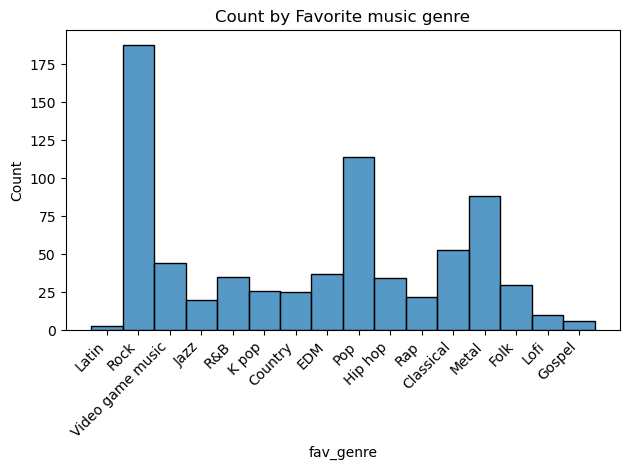

In [90]:
# Histogram for counting the total for each favorite genre
sns.histplot(df_cleaned['fav_genre'])
plt.title('Count by Favorite music genre')

# Rotate x-axis labels to be diagonal (45 degrees)
plt.xticks(rotation=45, ha='right')  # 'ha' aligns the labels right-justified at their center
plt.tight_layout()  # This ensures that the labels (and other figure elements) fit well into the figure area
plt.show()

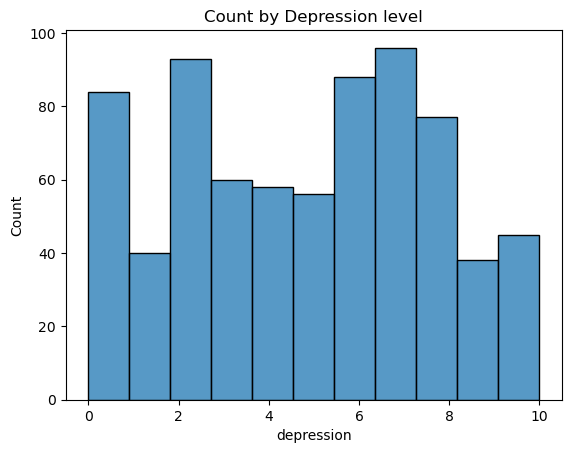

In [92]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['depression'])
plt.title('Count by Depression level')
plt.show()

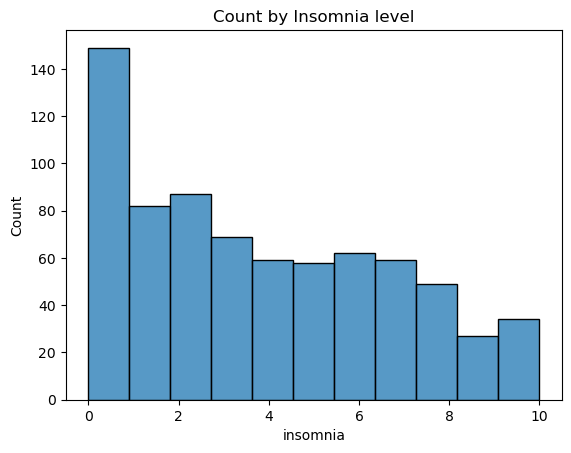

In [93]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['insomnia'])
plt.title('Count by Insomnia level')
plt.show()

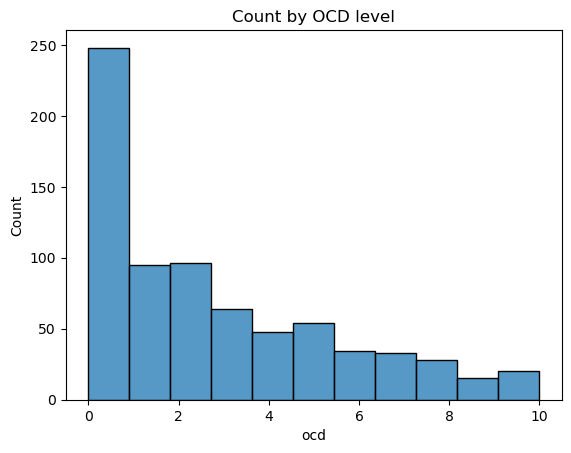

In [94]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['ocd'])
plt.title('Count by OCD level')
plt.show()

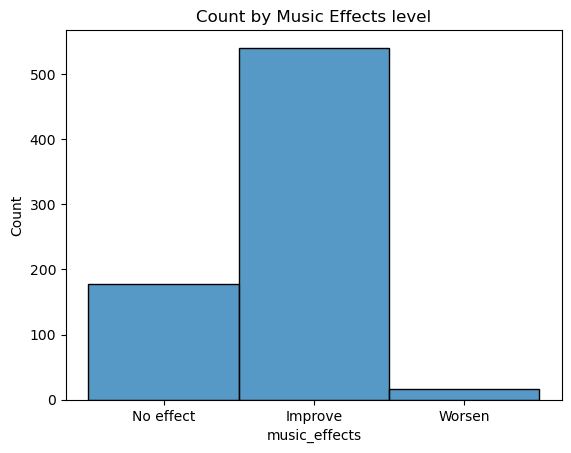

In [95]:
# Histogram for counting the total for each depression level
sns.histplot(df_cleaned['music_effects'])
plt.title('Count by Music Effects level')
plt.show()

In [96]:
# Saving the column names for freq_<music_genre> columns
freq_columns = [col for col in df_cleaned.columns if col.startswith('freq')]

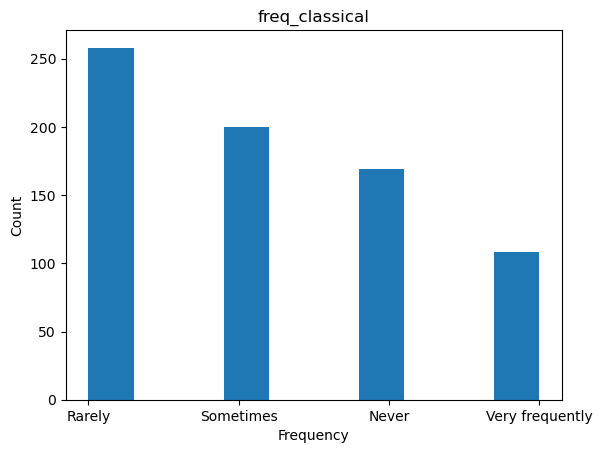

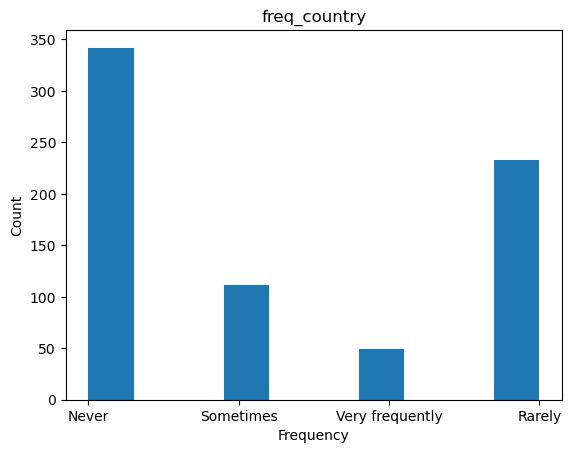

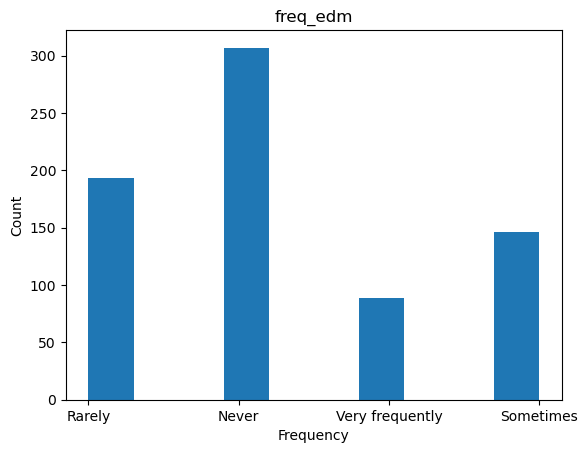

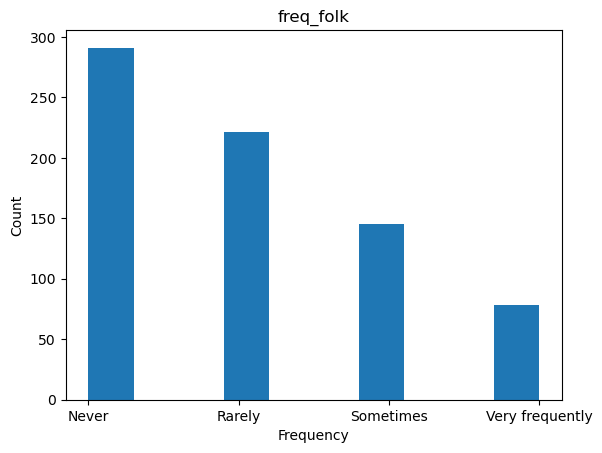

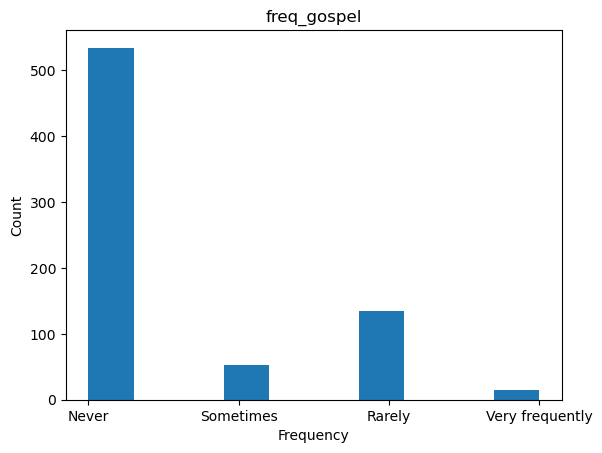

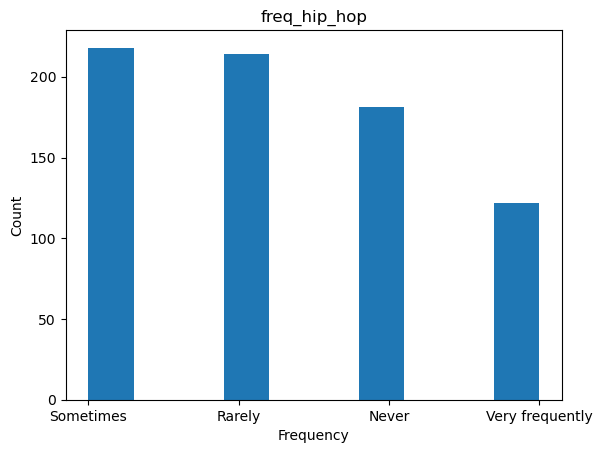

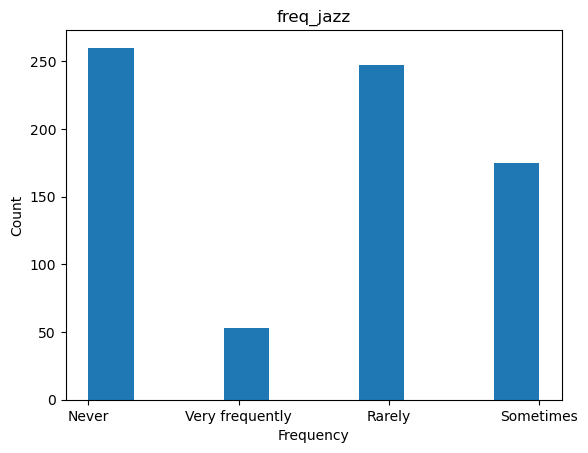

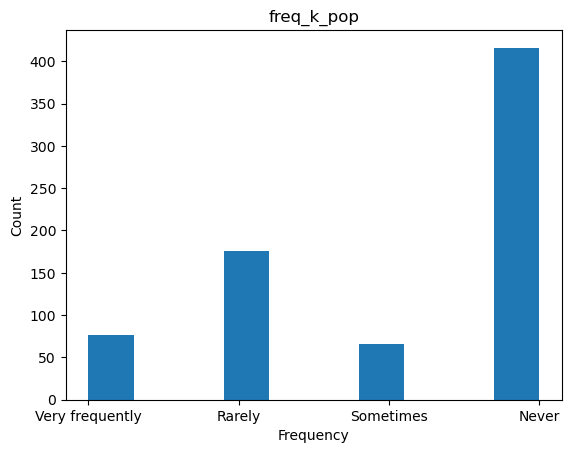

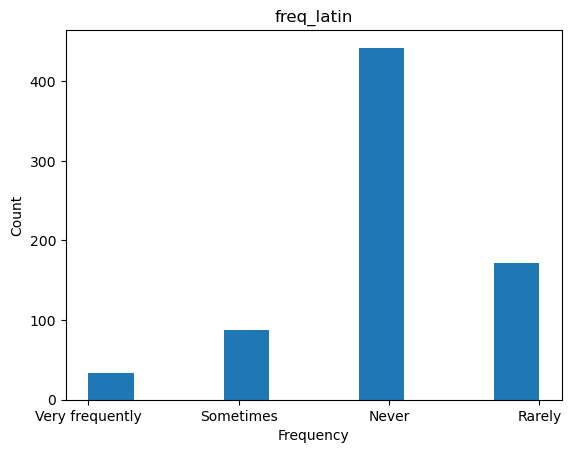

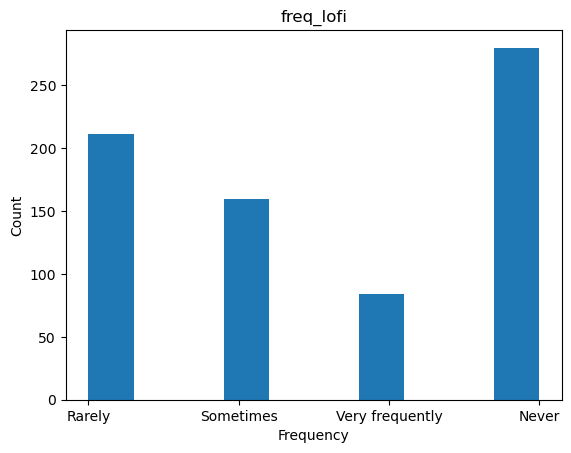

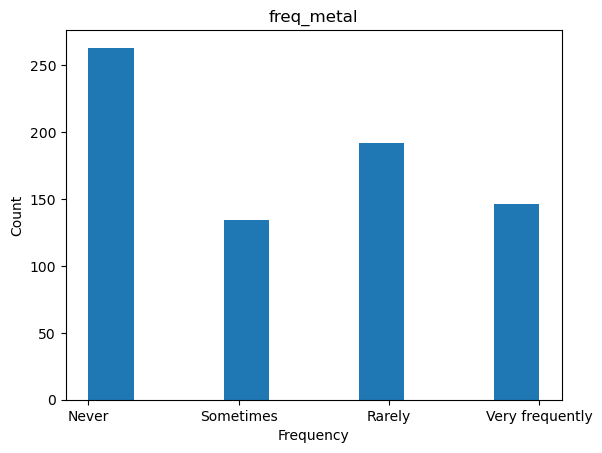

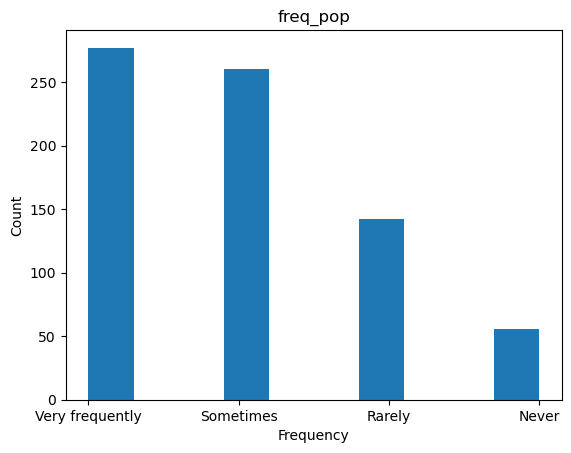

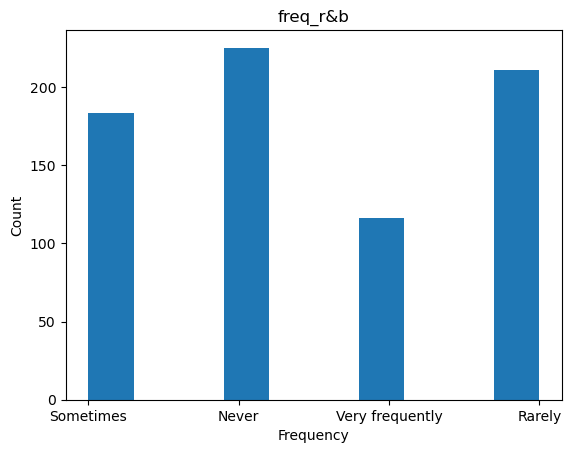

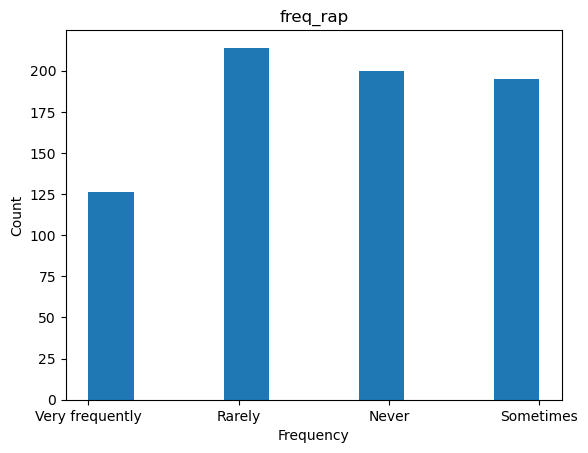

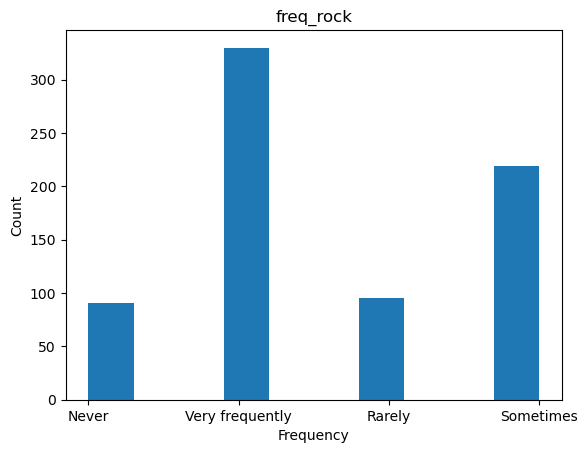

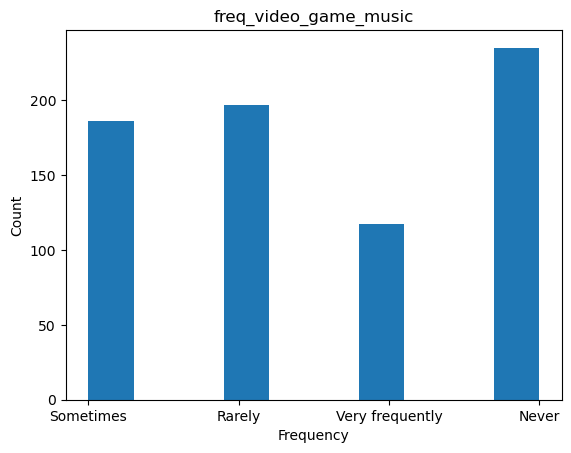

In [99]:
# Plotting each freq_<music_genre> column
for col in freq_columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df_cleaned[col])  # Plot histogram
    plt.title(col)  # Set title to column name
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.show()